In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
#analysing the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


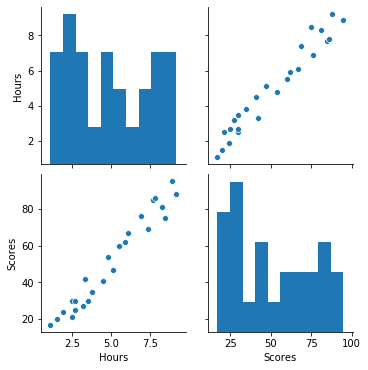

In [6]:
#checking the dependent and independent variable
sns.pairplot(data)

In [7]:
#assigning values to x and y
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [8]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

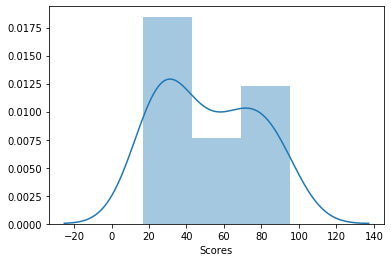

In [10]:
sns.distplot(data['Scores'])

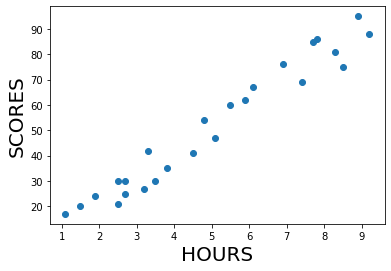

In [11]:
plt.scatter(X,y)
plt.xlabel('HOURS',fontsize=20)
plt.ylabel('SCORES',fontsize=20)
plt.show()

In [12]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=60)

In [13]:
print(x_train.shape)
print(x_test.shape)

(20, 1)
(5, 1)


In [14]:
print(y_train.shape)
print(y_test.shape)

(20,)
(5,)


In [15]:
#training the model
regressor=LinearRegression()
result=regressor.fit(x_train,y_train)

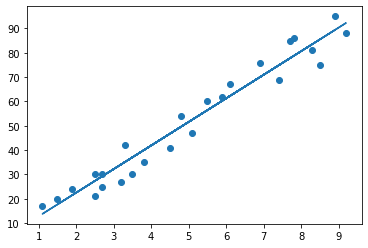

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [17]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.1]
 [2.7]
 [5.9]
 [2.5]
 [2.7]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,17,13.765605
1,30,29.271268
2,62,60.282595
3,21,27.333060
4,25,29.271268


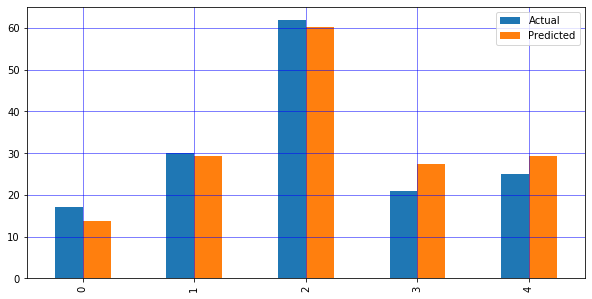

In [19]:
#actual vs predicted difference
df.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')
plt.show()

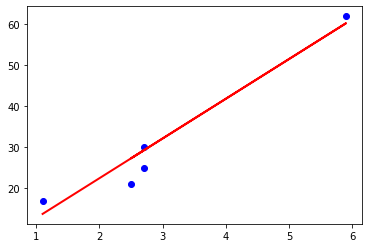

In [20]:
#after fitting the regression line
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [21]:
#checking with a custom value
print("The score of the student who studies for 9.25 hours is approximately:")
regressor.predict([[9.25]])

The score of the student who studies for 9.25 hours is approximately:


array([92.74757781])

In [22]:
#evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.256972083783501
Mean Squared Error: 14.458645457297166
Root Mean Squared Error: 3.802452558191511


In [23]:
#alternative way by finding the coefficients on our own
x=sm.add_constant(X)
results=sm.OLS(y,x).fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           9.13e-17
Time:                        13:19:22   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

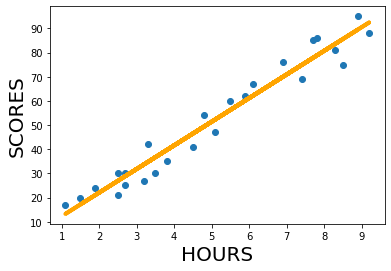

In [25]:
plt.scatter(X,y)
yhat=9.7758*X+2.4837
fig=plt.plot(X,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('HOURS',fontsize=20)
plt.ylabel('SCORES',fontsize=20)
plt.show()

In [26]:
#According to the question 
X=9.25
yhat=9.7758*X+2.4837

In [27]:
print("Score after studyig for 9.25 hours is")
yhat

Score after studyig for 9.25 hours is


92.90985